In [1]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

data = pd.read_excel("./MarketSales.xlsx")
data['ITEMCODE'] = data['ITEMCODE'].astype('str')
data['FICHENO'] = data['FICHENO'].astype('str')
data['FICHENO'] = data['FICHENO'].astype('str')
data['DATE_'] = pd.to_datetime(data['DATE_'])
data = data.dropna()
data.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.0,2.0,1.85,52.0,...,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.4,0.4,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.4,0.4,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.4,0.4,0.37,41.0,...,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K
6,11845.0,3202.0,F NEFFIS TOZ SEKER 2 KG,18476,2017-01-07,1.0,5.6,5.6,5.19,55.0,...,5481,Asel LÜLECİOĞLU,49,F NEFFİS,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-08 17:20:53,2017-01-08 17:21:05,K


In [3]:
data.dtypes

ID                       float64
ITEMCODE                  object
ITEMNAME                  object
FICHENO                   object
DATE_             datetime64[ns]
AMOUNT                   float64
PRICE                    float64
LINENETTOTAL             float64
LINENET                  float64
BRANCHNR                 float64
BRANCH                    object
SALESMAN                  object
CITY                      object
REGION                    object
LATITUDE                 float64
LONGITUDE                float64
CLIENTCODE                object
CLIENTNAME                object
BRANDCODE                 object
BRAND                     object
CATEGORY_NAME1            object
CATEGORY_NAME2            object
CATEGORY_NAME3            object
STARTDATE         datetime64[ns]
ENDDATE           datetime64[ns]
GENDER                    object
dtype: object

### Resumen estadistico

In [4]:
# media, mediana, desviación estándar, valores mínimos y máximos y percentiles
data.describe().T

# Dado que los valores son categoricos no tiene como tal algun valor minimo, maximo o percentil que pueda representar los datos, sin embargo
# Podemos saber el valor estadistico de los pedidos, los productos, por tipo de 

,count,mean,std,min,25%,50%,75%,max
ID,365889.0,307608.072812,1.813112e+05,2.0000,153699.0000,306310.0000,459375.0000,1.445622e+06
AMOUNT,365889.0,1.254901,1.756056e+00,0.0010,1.0000,1.0000,1.0000,2.400000e+02
PRICE,365889.0,4.230452,6.097786e+00,0.0100,1.0000,2.2500,4.9000,1.078000e+03
LINENETTOTAL,365889.0,4.206140,7.162978e+00,0.0100,1.2000,2.4200,4.9500,1.439200e+03
LINENET,365889.0,3.850532,6.516008e+00,0.0100,1.0600,2.2200,4.5400,1.219660e+03
BRANCHNR,365889.0,39.159035,2.184595e+01,1.0000,22.0000,40.0000,55.0000,8.100000e+01
LATITUDE,365889.0,39.311676,1.582119e+00,36.4018,37.8667,39.7767,41.0053,4.202310e+01
LONGITUDE,365889.0,306566.261458,3.618511e+06,26.4142,28.9770,31.7987,36.3498,4.302160e+07


In [5]:
### Cuales son las marcas que mas se piden?
sell_client = data.groupby(['ITEMNAME', 'CLIENTCODE', 'BRAND']).sum()[['AMOUNT',	'PRICE',	'LINENETTOTAL',	'LINENET',	'BRANCHNR']].reset_index()

In [6]:
sell_client['BRAND'].value_counts()[0:10]

ÜLKER        36647
ETİ          24240
BAKLİYAT     16369
PINAR        12967
SÜTAŞ        11756
 F NEFFİS    11645
ULUDAĞ        6504
NESTLE        5949
ARMONİ        5850
SENPİLİÇ      5238
Name: BRAND, dtype: int64

### Cuantos productos se piden por cada orden?

In [7]:
# data[data['FICHENO'] == 15560]

In [8]:
data.groupby(["FICHENO"]).agg({'ITEMCODE':'count', 'LINENET':'sum'}).reset_index().describe()

,ITEMCODE,LINENET
count,106518.000000,106518.000000
mean,3.434997,13.226567
std,4.453278,24.249774
min,1.000000,0.010000
25%,1.000000,2.380000
50%,2.000000,6.020000
75%,4.000000,14.580000
max,79.000000,2006.270000


## Cuantos registros existen en las primeras 10 ciudades?

In [9]:
data["CITY"].value_counts().sort_values(ascending=False).head(10)

İstanbul     67697
Ankara       24575
İzmir        19410
Bursa        12715
Antalya      10579
Konya         9609
Adana         9496
Şanlıurfa     8818
Gaziantep     8581
Zonguldak     8533
Name: CITY, dtype: int64

## Existen Valores atipicos?

In [10]:
import seaborn as sns
sns.set(style='whitegrid')  # Optional: set the style of the plot

# To display the boxplot for all columns in the dataframe
plt.figure(figsize=(10, 6))  # Optional: set the figure size
sns.boxplot(data=data['AMOUNT'])
plt.title('Boxplot of AMOUNT')
plt.show()

NameError: name 'plt' is not defined

In [12]:
# To display the boxplot for all columns in the dataframe
plt.figure(figsize=(10, 6))  # Optional: set the figure size
sns.boxplot(data=data['PRICE'])
plt.title('Boxplot of Price')
plt.show()

NameError: name 'plt' is not defined

In [13]:
data[data['AMOUNT'] >= 200]

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
259950,440029.0,2141.0,SUTAS AYRAN 225 ML,118156,2017-03-08,240.0,0.65,156.0,144.44,47.0,...,850455,Mahmut DANIŞMENT,137,SÜTAŞ,İÇECEK,GÜNLÜK İÇECEK,AYRAN,2017-03-09 09:36:26,2017-03-09 09:36:43,E


In [14]:
data[data['PRICE'] >= 1000]

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
265236,395868.0,5362.0,SİHİRLİ ELLER CİG KÖFTE 200GR,107960,2017-03-02,1.0,1078.0,1078.0,998.14,40.0,...,237685,Atakan OLGUN,346,SİHİRLİ ELLER,GIDA,HAZIR YEMEKLER,MEZE,2017-03-03 10:27:08,2017-03-03 10:27:45,E
265237,395869.0,5362.0,SİHİRLİ ELLER CİG KÖFTE 200GR,107960,2017-03-02,1.0,1078.0,1078.0,998.15,40.0,...,237685,Atakan OLGUN,346,SİHİRLİ ELLER,GIDA,HAZIR YEMEKLER,MEZE,2017-03-03 10:27:08,2017-03-03 10:27:45,E


### PCA

In [15]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [16]:
len(sell_client['ITEMNAME'].unique())

7431

In [17]:
matrix_prod = pd.crosstab(sell_client['CLIENTCODE'], sell_client['BRAND'])

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(matrix_prod)
pca_samples = pca.transform(matrix_prod)

In [19]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,0.302004,1.364257,1.762845,-0.803586,-0.312074,-0.146115,0.060721,-0.078701,0.257659,-0.139545,...,0.000459,-0.000236,0.000222,0.000127,0.000353,0.000512,0.000018,0.000095,-0.000230,0.000462
1,-1.025888,-0.019121,-0.166487,0.512772,-0.653487,0.218817,-0.078223,-0.225277,-0.159347,0.023674,...,0.000511,0.000021,-0.001509,-0.000026,0.000038,0.000098,-0.000034,-0.000024,0.000128,0.000072
2,-0.564312,0.801770,-0.052636,-0.200341,0.017607,0.037751,0.062471,0.035289,0.600480,-0.267437,...,0.000005,-0.001133,-0.000125,0.000002,0.000403,-0.001230,-0.000033,0.000129,0.000063,0.000162
3,-0.568893,0.835045,-0.095598,0.135394,0.365085,-0.730521,-0.020436,-0.254331,-0.033121,-0.050224,...,-0.000007,-0.001705,0.000107,-0.000050,-0.002122,-0.000067,-0.000032,0.000125,-0.000022,0.000123
4,-0.258351,-0.487202,-0.539623,-0.261994,-0.136211,-0.061725,-0.007647,-0.062534,0.088135,-0.028143,...,0.000234,0.000172,-0.000023,0.000211,0.000472,-0.001641,-0.000038,0.000147,0.000136,0.000024


(45942, 2)
         10        12
0 -0.862192  0.283661
1  0.080550  0.003723
2 -0.907283 -0.680500
3 -0.231471  0.085872
4 -0.141151 -0.082285


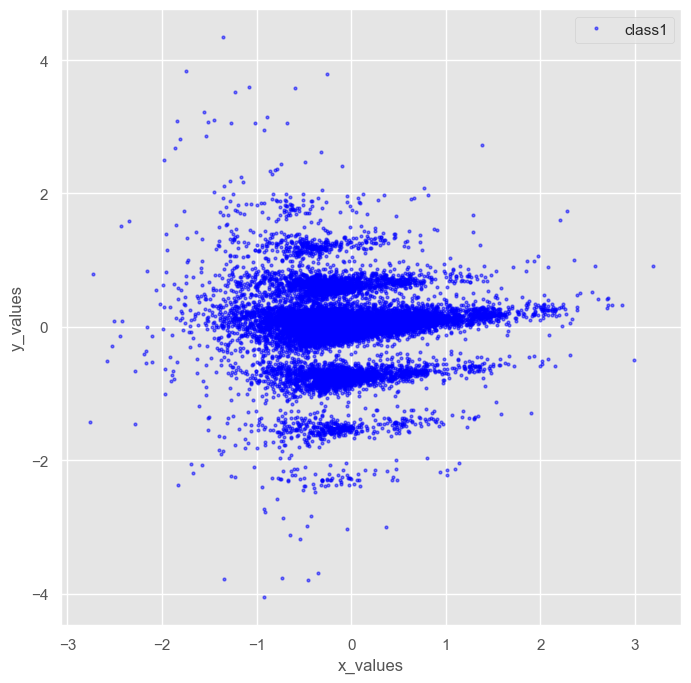

In [39]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[10,12]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[10], tocluster[12], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[-0.2132858   0.95264716]
 [ 0.71088908 -0.07048577]
 [-0.19193793 -0.37212735]
 [-0.13355167  3.09166658]]


['orange', 'purple', 'purple', 'blue', 'purple', 'blue', 'blue', 'blue', 'purple', 'purple']


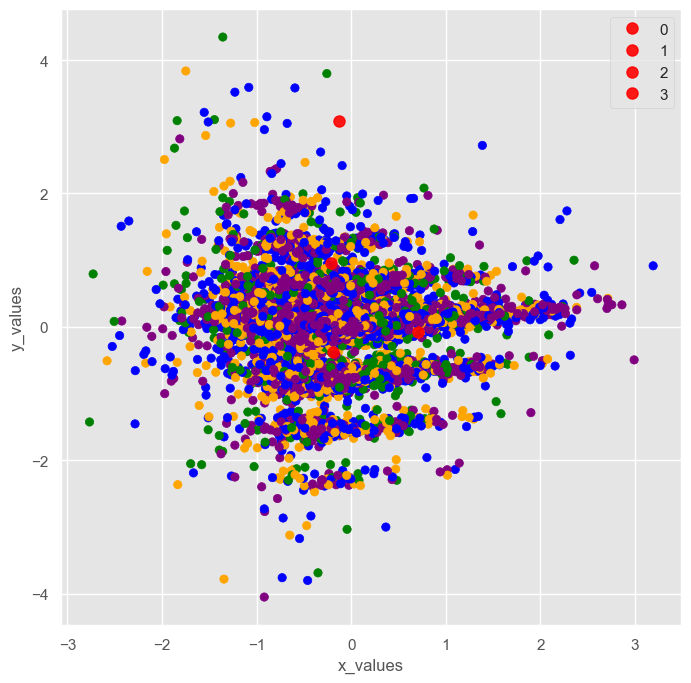

In [40]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[10],tocluster[12],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.2250337  0.31058429 0.37916312 0.41858321 0.44664386 0.47331052
 0.4979207  0.51520609 0.53088143 0.54594887 0.55999626 0.57277808
 0.58490969 0.59649367 0.60754091 0.6182594  0.62885728 0.63905124
 0.64851927 0.65765303 0.66619615 0.6746093  0.68257176 0.69047076
 0.6979175  0.70518669 0.7120669  0.71869167 0.72490474 0.73101691
 0.73704124 0.74278793 0.7484953  0.75379951 0.75901714 0.76417145
 0.76911486 0.77381958 0.77822642 0.78244822 0.78656638 0.79057982
 0.79454369 0.79842965 0.80229021 0.8059263  0.80951774 0.81287676
 0.81613202 0.81936697 0.82249577 0.82558003 0.82858467 0.83141389
 0.83417687 0.8368841  0.8394978  0.84201626 0.84447891 0.84690513
 0.84927593 0.85154673 0.85377588 0.85599602 0.85819491 0.86037744
 0.86254376 0.86465646 0.86675739 0.8688114  0.87084842 0.87286291
 0.87484327 0.8768128  0.87877286 0.88071815 0.88262363 0.88448915


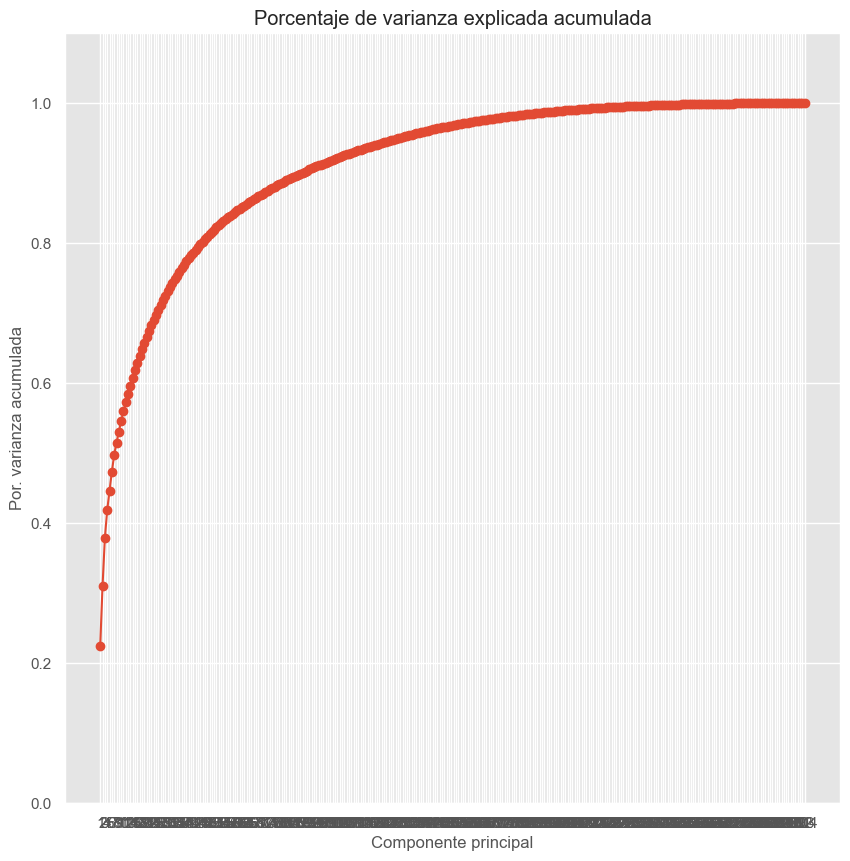

In [27]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(
    np.arange(len(matrix_prod.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

# for x, y in zip(np.arange(len(matrix_prod.columns)) + 1, prop_varianza_acum):
#     label = round(y, 2)
#     ax.annotate(
#         label,
#         (x,y),
#         textcoords="offset points",
#         xytext=(0,10),
#         ha='center'
#     )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [28]:
arreglo_filtrado = [x for x in prop_varianza_acum if x < 0.7]
len(arreglo_filtrado)

25

In [21]:
print("Variance explained by the First 3 principal components ", np.cumsum(pca.explained_variance_ratio_ * 100)[25])

Variance explained by the First 3 principal components  70.51866940287098


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca.fit(matrix_prod)
pca_samples = pca.transform(matrix_prod)

### Ejemplos de cluster

In [ ]:
ps = pd.DataFrame(pca_samples)
ps.head()

In [46]:
# Crea una instancia del modelo K-Means
kmeans_model = KMeans(n_clusters=5, random_state=42)

# Ajusta el modelo a los datos reducidos con PCA
kmeans_model.fit(pca_samples)

# Agrega una columna al dataframe original para indicar a qué cluster pertenece cada solicitante
matrix_prod['Cluster'] = kmeans_model.labels_

In [47]:
matrix_prod['Cluster'].value_counts()

0    32089
3     5425
2     4119
4     3038
1     1271
Name: Cluster, dtype: int64

### Resultados

In [53]:
cluster = matrix_prod.reset_index()[['CLIENTCODE', 'Cluster']]
cluster.dtypes

BRAND
CLIENTCODE    object
Cluster        int32
dtype: object

In [55]:
new_result = sell_client.merge(cluster, on=['CLIENTCODE'], how='left').dropna()

In [62]:
brand_top = new_result.groupby(['Cluster', 'BRAND']).count()['ITEMNAME'].reset_index()


In [75]:
sell_client[sell_client['BRAND'] == 'HALK']

,ITEMNAME,CLIENTCODE,BRAND,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR
138634,HALK BAHARATLI PIZZA KRAKER 4*60 GR,1048368,HALK,1.0,0.99,0.99,0.92,75.0
138635,HALK BAHARATLI PIZZA KRAKER 4*60 GR,155655,HALK,1.0,0.99,0.99,0.92,26.0
138636,HALK BAHARATLI PIZZA KRAKER 4*60 GR,218916,HALK,1.0,0.99,0.99,0.91,20.0
138637,HALK BAHARATLI PIZZA KRAKER 4*60 GR,245461,HALK,1.0,0.99,0.99,0.92,64.0
138638,HALK BAHARATLI PIZZA KRAKER 4*60 GR,400594,HALK,1.0,0.99,0.99,0.92,17.0
...,...,...,...,...,...,...,...,...
142229,HALK TAVUK BULYON 24 TABLET,644472,HALK,1.0,2.00,2.00,1.85,6.0
142230,HALK TAVUK BULYON 24 TABLET,660094,HALK,1.0,2.25,2.25,2.08,40.0
142231,HALK TAVUK BULYON 24 TABLET,69563,HALK,1.0,2.25,2.25,2.08,40.0
142232,HALK TAVUK BULYON 24 TABLET,850157,HALK,1.0,2.25,2.25,2.08,40.0


In [68]:
brand_top[brand_top['Cluster'] == 0].sort_values(by=['ITEMNAME'], ascending=False).head(10)
# KASAP

,Cluster,BRAND,ITEMNAME
292,0,ÜLKER,8052
215,0,PINAR,6674
251,0,SÜTAŞ,6355
1,0,F NEFFİS,6042
105,0,ETİ,5145
25,0,BAKLİYAT,3951
268,0,ULUDAĞ,3643
190,0,NESTLE,3063
18,0,ARMONİ,3042
155,0,KASAP,2923


In [69]:
brand_top[brand_top['Cluster'] == 1].sort_values(by=['ITEMNAME'], ascending=False).head(10)

,Cluster,BRAND,ITEMNAME
573,1,ÜLKER,7698
396,1,ETİ,3658
326,1,BAKLİYAT,1775
501,1,PINAR,1195
535,1,SÜTAŞ,924
302,1,F NEFFİS,889
477,1,NESTLE,537
319,1,ARMONİ,528
428,1,HALK,511
313,1,ANKARA,480


In [71]:
brand_top[brand_top['Cluster'] == 2].sort_values(by=['ITEMNAME'], ascending=False).head(10)

,Cluster,BRAND,ITEMNAME
679,2,ETİ,11675
861,2,ÜLKER,3966
786,2,PINAR,1700
821,2,SÜTAŞ,1428
582,2,F NEFFİS,1196
606,2,BAKLİYAT,1017
838,2,ULUDAĞ,864
762,2,NESTLE,772
693,2,FRİTO,768
599,2,ARMONİ,658


In [72]:
brand_top[brand_top['Cluster'] == 3].sort_values(by=['ITEMNAME'], ascending=False).head(10)

,Cluster,BRAND,ITEMNAME
1152,3,ÜLKER,14477
968,3,ETİ,2368
1074,3,PINAR,2113
870,3,F NEFFİS,1929
1110,3,SÜTAŞ,1895
894,3,BAKLİYAT,1370
1049,3,NESTLE,1037
1128,3,ULUDAĞ,985
887,3,ARMONİ,918
1158,3,İÇİM SEHER,856


In [73]:
brand_top[brand_top['Cluster'] == 4].sort_values(by=['ITEMNAME'], ascending=False).head(10)

,Cluster,BRAND,ITEMNAME
1186,4,BAKLİYAT,8256
1439,4,ÜLKER,2454
1162,4,F NEFFİS,1589
1261,4,ETİ,1394
1364,4,PINAR,1285
1398,4,SÜTAŞ,1154
1387,4,SENPİLİÇ,706
1179,4,ARMONİ,704
1434,4,ÇAYKUR,688
1173,4,ANKARA,664
